In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load in the dataframe
df = pd.read_csv("resort_reviews_sentiment.csv")

df.head()

,review_id,resort,full_day_price,avg_rating,review,text_length,label,score
0,1,Perisher Ski Resort,1379.0,5.0,Highly recommended! Me and my family had a fan...,458,POSITIVE,0.999874
1,2,Perisher Ski Resort,1379.0,5.0,"Visited Perisher valley, Smiggin Holes.. Which...",339,POSITIVE,0.991743
2,3,Perisher Ski Resort,1379.0,3.0,Perisher Valley is absolutely magical – the sn...,871,NEGATIVE,0.989859
3,4,Perisher Ski Resort,1379.0,2.0,We do the skiing once a year during the last 9...,1478,NEGATIVE,0.998968
4,5,Perisher Ski Resort,1379.0,4.0,I think Perisher does a good job given the con...,194,NEGATIVE,0.997874


In [8]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of resorts in this dataset such as {}... \n".format(len(df.resort.unique()),
                                                                           ", ".join(df.resort.unique()[0:5])))


There are 270 observations and 8 features in this dataset. 

There are 9 types of resorts in this dataset such as Perisher Ski Resort, Mt Buller, Mt Stirling, Thredbo Alpine Hotel, Mount Baw Baw... 



In [9]:
resort_names = list(df.resort.unique())

dfs_by_resort = {}

for resort in resort_names:
    dfs_by_resort[resort] = df[df['resort'] == resort]


# turn or reviews into list of strings
resort_text_dict = {}

for resort, df in dfs_by_resort.items():
    reviews = df['review'].values.tolist()
    resort_text_dict[resort] = reviews

resort_text_dict['Mt Buller'][:3]

["Mt Buller is hands down one of the best ski resorts near Melbourne! I’ve been coming up every Sunday and it never disappoints — the slopes are well-maintained, and the overall vibe on the mountain is energetic and welcoming. My daughter has been taking private lessons, and her coach has been incredible — patient, knowledgeable, and genuinely invested in helping her improve. The progress she’s made has been amazing to watch. Whether you're a beginner or experienced skier, Mt Buller offers a fantastic snow experience for everyone. Highly recommend!",
 "Mount Buller in winter truly casts a spell! Even amidst a gentle mist, the pristine snow-covered landscapes and the crisp, invigorating mountain air weave an unforgettable tapestry of romance. From the shared thrills on the slopes to the cozy warmth by a crackling fire pit, and the breathtaking scenic chairlift rides offering intimate glimpses of the surrounding beauty, it's an absolutely incredible and deeply romantic alpine escape in V

In [12]:
corpus_perisher = resort_text_dict['Perisher Ski Resort']
corpus_perisher = " ".join(corpus_perisher)

corpus_buller = resort_text_dict['Mt Buller']
corpus_buller = " ".join(corpus_buller)

corpus_stirling = resort_text_dict['Mt Stirling']
corpus_stirling = " ".join(corpus_stirling)

corpus_thredbo = resort_text_dict['Thredbo Alpine Hotel']
corpus_thredbo = " ".join(corpus_thredbo)

corpus_baw_baw = resort_text_dict['Mount Baw Baw']
corpus_baw_baw = " ".join(corpus_baw_baw)

corpus_hotham = resort_text_dict['Mount Hotham']
corpus_hotham = " ".join(corpus_hotham)

corpus_charlotte = resort_text_dict['Charlotte Pass Snow Resort']
corpus_charlotte = " ".join(corpus_charlotte)

corpus_falls = resort_text_dict['Falls Creek']
corpus_falls = " ".join(corpus_falls)

corpus_selwyn = resort_text_dict['Selwyn']
corpus_selwyn = " ".join(corpus_selwyn)

Selwyn

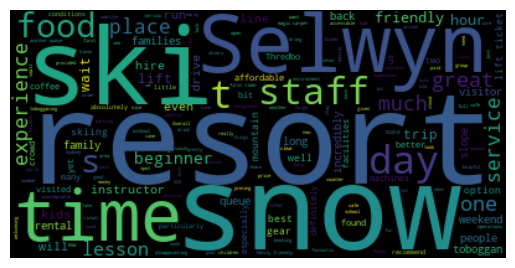

In [13]:
# Start with one review:
text = corpus_selwyn

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()